<a href="https://colab.research.google.com/github/vvthakral/Python-for-AI-Data-Science/blob/master/Deep_Learning_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This tutorial has been referred from https://nextjournal.com/gkoehler/digit-recognition-with-keras
#Additional Content
#prediction code
#self-tune model
#calculation is computed

In [10]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import keras
import matplotlib.pyplot as plt

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [27]:
X_train[0]
print(X_train.shape)

(60000, 28, 28)


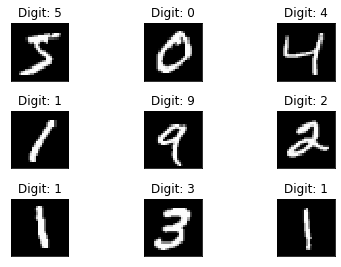

In [32]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [33]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [34]:
n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [35]:
print(Y_train[0])
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


#Creating Model!

In [36]:
# building a linear stack of layers with the sequential model
model = Sequential()

model.add(Dense(512, input_shape=(784,),activation='relu'))                         
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


#Calculation

Input layer : 784<br>
First Hidden layer : 512<br> 
Biases = 512<br>

total_params = 784*512 + 512


In [38]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [39]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=2,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
 - 6s - loss: 0.2909 - accuracy: 0.9134 - val_loss: 0.1149 - val_accuracy: 0.9638
Epoch 2/2
 - 6s - loss: 0.1148 - accuracy: 0.9653 - val_loss: 0.0771 - val_accuracy: 0.9759


In [46]:
model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 1s 60us/step


[0.0771450330896303, 0.9758999943733215]

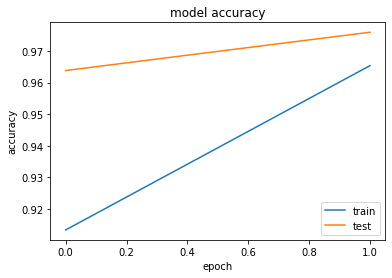

In [40]:
# plotting the metrics
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

#Making Prediction on unseen image

array([5])

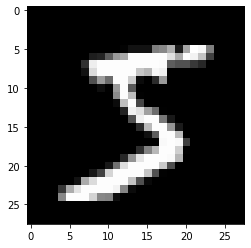

In [83]:
import numpy as np

test_sample = np.expand_dims(X_train[0],axis=0)
img = test_sample.reshape(28,28)
plt.imshow(img,cmap='gray')


np.argmax(model.predict(test_sample),axis=1)


In [63]:
import os
# saving the model
save_dir = "/content"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

/content/keras_mnist.h5
Saved trained model at /content/keras_mnist.h5 
